Do  zrobienia:

(*) zakodować KOLOROWY obrazek 

(*) funkcja convert_to_pixels_array <-- powinna traktowaćplamki koloru jak KOŁA

PROBLEM: nie aktualizuja sie zmiany w individual.py !!

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


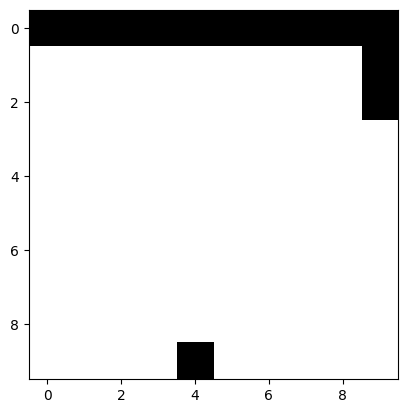

In [75]:
from individual import Individual
from individual import Splash

# import individual from imp import reload reload(individual)

# import importlib
# importlib.reload(Individual)
# importlib.reload(Splash)

# # Individual.reload()
# # reload(Splash)

def test_convert_to_pixels_array():

    N = 10
    max_rank = 4

    def generate_splash(N, max_rank):
        splash_list = [Splash(np.array([0, 0, 0]), 0) for i in range(N)]
        for splash in splash_list:
            splash.random_splash(max_rank)
            # splash.red_splash()

        return splash_list
    
    def generate_specific_splash_layout(N, length, widith):
        layout = np.zeros((N, 2))
        for i in range(N):
            x, y = np.random.randint(0,length), np.random.randint(0,widith)
            layout[i] = np.array([x, y])
        return layout
    
    splash_parameters = generate_splash(N, max_rank)
    splash_layout = generate_specific_splash_layout(N, 10, 10)

    # print(splash_parameters)
    # print(splash_layout)

    indiv = Individual(splash_parameters, splash_layout)
    # pixels_array = indiv.convert_to_pixels_array()
    # print(pixels_array)
    indiv.show_image()

test_convert_to_pixels_array()